In [1]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# It is much better to make this an importable module
# so that you can simple call import my_kde, 
# but for this example %run is just as good.
%run kde.py

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
         1.,  0.,  2.,  0.,  1.,  2.,  2.,  2.,  0.,  5.,  4.,  3.,  6.,
         4.,  4.,  3.,  7.,  5.,  4.,  4.,  5., 10.,  5.,  5., 11.,  6.,
        12., 10.,  9., 14., 16., 11., 12., 13., 13., 22., 19., 13., 14.,
        20., 24., 19., 18., 16., 19., 20., 20., 25., 25., 15., 25., 25.,
        18., 23., 16., 19., 17., 29., 24., 20., 16., 20., 21., 20., 16.,
        17., 13., 18., 12., 13., 18., 13., 16., 14.,  6., 10.,  8.,  6.,
         6.,  3.,  3.,  5.,  2.,  1.,  1.,  1.,  1.]),
 array([0.07390186, 0.08299145, 0.09208104, 0.10117063, 0.11026021,
        0.1193498 , 0.12843939, 0.13752898, 0.14661857, 0.15570816,
        0.16479775, 0.17388734, 0.18297692, 0.19206651, 0.2011561 ,
        0.21024569, 0.21933528, 0.22842487, 0.23751446, 0.24660404,
        0.25569363, 0.26478322, 0.27387281, 0.2829624 , 0.29205199,
        0.30114158, 0.31023117, 0.31932075, 0.32841034, 0.33749993,
        0.34658952, 0.3556

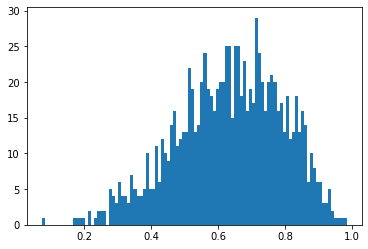

In [3]:
sample_values = np.random.beta(5, 3, size = 1000)
plt.hist(sample_values, bins = 100)


In [4]:
kde = KernelDensityEstimator()

kde.set_samples(sample_values)

print("The KDE's bandwidth ", kde.bandwidth)

The KDE's bandwidth  0.03964725549745112


([<matplotlib.axis.XTick at 0x7f13adf5d970>,
 [Text(0, 0, '0.0'),
  Text(1000, 0, '0.2'),
  Text(2000, 0, '0.4'),
  Text(3000, 0, '0.6'),
  Text(4000, 0, '0.8'),
  Text(5000, 0, '1.0')])

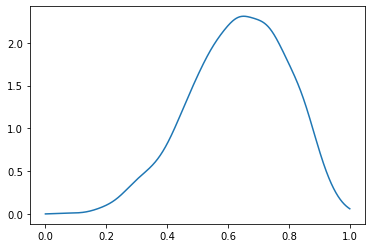

In [5]:
sz = 5000

x = np.linspace(0,1, num = sz)
tx = [t*sz//5 for t in range(6)]
lb = [t/sz for t in tx]

like = kde.likelihood(x)
plt.plot(like)
plt.xticks(tx,lb)

In [6]:
# f(x) = cos(x)
f = dict(zip(x/sz,np.cos(x)))


kde.integrate(f)

0.8411045170455023

In [7]:
# It is important to remember that you can use these objects
#the way you would any other python objects, 
#like putting them in lists or dicts or whatever

models = {}
for i in range(5):
    samples = np.random.beta(i+1, 5 - i, size = 50)
    kde = KernelDensityEstimator(sample_points = samples)
    models[np.mean(samples)] = kde
    
    
for model in models:
    print(" Mean: ", model, "Integration: ", models[model].integrate(f))
    

 Mean:  0.17866310895562287 Integration:  0.8414012293262169
 Mean:  0.32225186577349973 Integration:  0.841383199515944
 Mean:  0.527356801015584 Integration:  0.8412526594438654
 Mean:  0.6250407673117603 Integration:  0.8411473640365057
 Mean:  0.8644605125815156 Integration:  0.8398113811596417
